In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import random
import seaborn as sns
import requests
import time
import urllib

In [37]:
# Incorporated citipy to determine city based on latitude and longitude
import citipy

In [38]:
# Output File (CSV)
output_data_file = "C:/Users/owner/Desktop/Python_API_HW Folder/Output/cities.csv"
output_data_file

'C:/Users/owner/Desktop/Python_API_HW Folder/Output/cities.csv'

In [39]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [40]:
# set up lists lat_lngs and cities to hold response
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


print(f"The latitude information received is: {lats}")
print(f"The lngs information received is: {lngs}")
print(f"The lat_lngs information received is: {lat_lngs}")

The latitude information received is: [-26.21262081  48.32428423 -89.66524065 ...  21.84584163  -6.28181399
   8.67735794]
The lngs information received is: [ 110.01679818  -80.53025333   -9.40690317 ... -178.92660492   28.18774951
    8.23233064]
The lat_lngs information received is: <zip object at 0x00D94B48>


In [41]:
# Identifing nearest city for each latitude and longitude
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:cities.append(city)

In [42]:
# Print the city count to confirm sufficient count and unique value
len(cities)

611

In [43]:
# Print the city count to confirm sufficient count and unique value
cities

['carnarvon',
 'iroquois falls',
 'hermanus',
 'tahta',
 'lasa',
 'ponta do sol',
 'tezu',
 'port-gentil',
 'grand river south east',
 'timizart',
 'hilo',
 'ust-kamchatsk',
 'poum',
 'berbera',
 'hobart',
 'isla mujeres',
 'punta arenas',
 'diamantino',
 'vaitupu',
 'dujuma',
 'inyonga',
 'westport',
 'taolanaro',
 'palabuhanratu',
 'jati',
 'berlevag',
 'hirna',
 'puerto ayora',
 'kalmunai',
 'ushuaia',
 'kaitangata',
 'albany',
 'new norfolk',
 'bredasdorp',
 'nome',
 'cape town',
 'marcona',
 'bethel',
 'koumac',
 'butaritari',
 'ferrol',
 'ribeira grande',
 'barrow',
 'rikitea',
 'harper',
 'dikson',
 'tsihombe',
 'leningradskiy',
 'bengkulu',
 'hithadhoo',
 'camapua',
 'ilulissat',
 'sao joao da barra',
 'palaikastron',
 'semey',
 'arraial do cabo',
 'sitka',
 'port alfred',
 'jamestown',
 'mayo',
 'lompoc',
 'hami',
 'avarua',
 'luderitz',
 'chuy',
 'cumra',
 'kapaa',
 'tiksi',
 'pacific grove',
 'salalah',
 'busselton',
 'qaanaaq',
 'miles city',
 'rawannawi',
 'salamiyah',
 't

In [44]:
# Importing weathermap api_key from api_keys.py
from api_keys import api_key

# URL for Weather Map API Call 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# setting up lists for cities to hold response
# Result of created city_response_data will be appended
city_response_data = []

# Printing Beginning Data Retrieval and spearation lines to logger
print("Beginning Data Retrieval")
print("------------------------")

# Creating counters for the record counts and set counts
# set count is for cities grouped in sets of 50
record_count = 1
set_count = 1

# Looping through each city from the list
for i, city in enumerate(cities):
        
    # Grouping cities in sets of 50 for logger
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Using urllib from Depdendcies and creating endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Print the url, with record count, set count, and city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Running an API request for each of the cities
    try:
        # Getting request into city_weather_req
        city_weather_req = requests.get(city_url).json()

        # setting up variables- latitude,longitude,max temp,humidity,cloudiness,windspeed,country name, and date from city url
        city_lat = city_weather_req["coord"]["lat"]
        city_lng = city_weather_req["coord"]["lon"]
        city_max_temp = city_weather_req["main"]["temp_max"]
        city_humidity = city_weather_req["main"]["humidity"]
        city_clouds = city_weather_req["clouds"]["all"]
        city_wind = city_weather_req["wind"]["speed"]
        city_country = city_weather_req["sys"]["country"]
        city_date = city_weather_req["dt"]

        #List of city results appended with city_response_data list
        city_response_data.append({"City": city,"Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp,
                          "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind,
                          "Country": city_country, "Date": city_date})

    # If an error occurs, skip the city and print city not found
    except:
        print("City not found. Skipping...")
        pass
              
# Print Data Loading is complete 
print("Data Retrieval Complete ")
print("------------------------")
        

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=carnarvon
Processing Record 2 of Set 1 | iroquois falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=iroquois%20falls
Processing Record 3 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=hermanus
Processing Record 4 of Set 1 | tahta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=tahta
City not found. Skipping...
Processing Record 5 of Set 1 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=lasa
Processing Record 6 of Set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=ponta%20do%20

Processing Record 2 of Set 2 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=sao%20joao%20da%20barra
Processing Record 3 of Set 2 | palaikastron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=palaikastron
Processing Record 4 of Set 2 | semey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=semey
Processing Record 5 of Set 2 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=arraial%20do%20cabo
Processing Record 6 of Set 2 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=sitka
Processing Record 7 of Set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=port%20alfred
Processing Record 8 of Set 2 | jamestown
h

Processing Record 4 of Set 3 | tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=tateyama
Processing Record 5 of Set 3 | tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=tevaitoa
Processing Record 6 of Set 3 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=norman%20wells
Processing Record 7 of Set 3 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=vardo
Processing Record 8 of Set 3 | spetsai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=spetsai
City not found. Skipping...
Processing Record 9 of Set 3 | leesburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=leesburg
Processing Record 10 of Set 3 | nanortalik
http://api.open

Processing Record 6 of Set 4 | osmena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=osmena
Processing Record 7 of Set 4 | balezino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=balezino
Processing Record 8 of Set 4 | brookhaven
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=brookhaven
Processing Record 9 of Set 4 | morondava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=morondava
Processing Record 10 of Set 4 | jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=jalu
Processing Record 11 of Set 4 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=severo-kurilsk
Processing Record 12 of Set 4 | rockland
http://api.openweathermap.org/data/2.5/

Processing Record 10 of Set 5 | eskasem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=eskasem
City not found. Skipping...
Processing Record 11 of Set 5 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=ostrovnoy
Processing Record 12 of Set 5 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=abu%20dhabi
Processing Record 13 of Set 5 | yantal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=yantal
Processing Record 14 of Set 5 | opelousas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=opelousas
Processing Record 15 of Set 5 | mouzakion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=mouzakion
City not found. Skipping...
Processing Record 16 o

Processing Record 13 of Set 6 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=klaksvik
Processing Record 14 of Set 6 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=los%20llanos%20de%20aridane
Processing Record 15 of Set 6 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=ketchikan
Processing Record 16 of Set 6 | steinbach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=steinbach
Processing Record 17 of Set 6 | kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=kulhudhuffushi
Processing Record 18 of Set 6 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=alice%20springs
Processing Record 19 o

Processing Record 16 of Set 7 | krasnolesnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=krasnolesnyy
Processing Record 17 of Set 7 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=richards%20bay
Processing Record 18 of Set 7 | basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=basco
Processing Record 19 of Set 7 | severnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=severnyy
City not found. Skipping...
Processing Record 20 of Set 7 | surt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=surt
Processing Record 21 of Set 7 | rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=rawson
Processing Record 22 of Set 7 | aswan
http://api.openw

Processing Record 20 of Set 8 | kisaran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=kisaran
Processing Record 21 of Set 8 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=umzimvubu
City not found. Skipping...
Processing Record 22 of Set 8 | haileybury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=haileybury
Processing Record 23 of Set 8 | meaford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=meaford
Processing Record 24 of Set 8 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=shimoda
Processing Record 25 of Set 8 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=port%20elizabeth
Processing Record 26 of Set 8 | attawapi

Processing Record 22 of Set 9 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=pangnirtung
Processing Record 23 of Set 9 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=itarema
Processing Record 24 of Set 9 | sebezh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=sebezh
Processing Record 25 of Set 9 | santa maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=santa%20maria
Processing Record 26 of Set 9 | pombal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=pombal
Processing Record 27 of Set 9 | rantepao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=rantepao
Processing Record 28 of Set 9 | charters towers
http://api.openweathermap.org/

Processing Record 25 of Set 10 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=katsuura
Processing Record 26 of Set 10 | myitkyina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=myitkyina
Processing Record 27 of Set 10 | simcoe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=simcoe
Processing Record 28 of Set 10 | oneonta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=oneonta
Processing Record 29 of Set 10 | senador jose porfirio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=senador%20jose%20porfirio
Processing Record 30 of Set 10 | ajdabiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=ajdabiya
Processing Record 31 of Set 10 | liepaja
http://ap

Processing Record 28 of Set 11 | port hawkesbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=port%20hawkesbury
Processing Record 29 of Set 11 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=tilichiki
Processing Record 30 of Set 11 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=marsa%20matruh
Processing Record 31 of Set 11 | novyye burasy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=novyye%20burasy
Processing Record 32 of Set 11 | sangre grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=sangre%20grande
Processing Record 33 of Set 11 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=deputatskiy
Processing Record 

Processing Record 30 of Set 12 | hervey bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=hervey%20bay
Processing Record 31 of Set 12 | yatou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=yatou
Processing Record 32 of Set 12 | reno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=reno
Processing Record 33 of Set 12 | oeiras do para
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=oeiras%20do%20para
Processing Record 34 of Set 12 | labrea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=labrea
City not found. Skipping...
Processing Record 35 of Set 12 | alghero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=alghero
Processing Record 36 of Set 12 | tsabong
http:

In [30]:
# Converting array of JSONs to create a Pandas DataFrame called city_weather_data_pd
city_weather_data_pd = pd.DataFrame(city_response_data)

# Extracting required variables-lat,max temp, humudity, cloudiness, and windspeed from the city_weather_data_pd dataframe for the scatter plot analysis
lats = city_weather_data_pd["Lat"]
max_temps = city_weather_data_pd["Max Temp"]
humidity = city_weather_data_pd["Humidity"]
cloudiness = city_weather_data_pd["Cloudiness"]
wind_speed = city_weather_data_pd["Wind Speed"]

# Exporting into a csv with the output data file created 
city_weather_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_weather_data_pd.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [31]:
# Display the City Data Frame with selected variables
city_weather_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,8,KI,1538975246,100,3.07,172.79,84.57,7.63
1,busselton,32,AU,1538974998,91,-33.64,115.35,65.40,7.52
2,angoche,80,MZ,1538975288,100,-16.23,39.91,77.19,13.22
3,avarua,75,CK,1538971200,83,-21.21,-159.78,78.80,6.93
4,kapaa,90,US,1538971200,79,22.08,-159.32,80.06,10.29


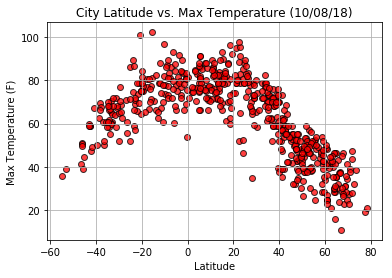

In [32]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, 
            marker="o", facecolors="red",alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure in the output file
plt.savefig("C:/Users/owner/Desktop/Python_API_HW Folder/Output/Scatter_Lat_maxtemp.png")

# Show plot
plt.show()

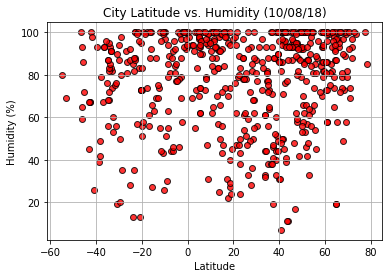

In [33]:
# Build the scatter plots for each city types
plt.scatter(lats,humidity,edgecolor="black", linewidths=1, marker="o", 
            facecolors="red",alpha=0.8, label="Cities")

# Labeling
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure in the output folder
plt.savefig("C:/Users/owner/Desktop/Python_API_HW Folder/Output/Scatter_Lat_humudity.png")

# Show plot
plt.show()

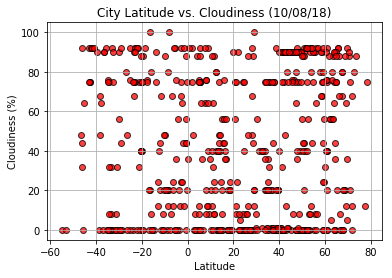

In [34]:
# Build the scatter plots for each city types
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, 
            marker="o", facecolors="red", alpha=0.75, label="Cities")

# Labeling
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure in the output folder
plt.savefig("C:/Users/owner/Desktop/Python_API_HW Folder/Output//Scatter_Lat_cloudiness.png")

# Show plot
plt.show()

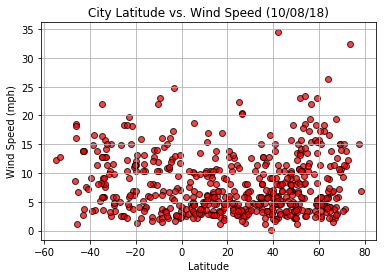

In [35]:
# Build the scatter plots for each city types
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1,
            marker="o", facecolors="red", alpha=0.75, label="Cities")

# Labeling
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure in the output folder
plt.savefig("C:/Users/owner/Desktop/Python_API_HW Folder/Output/Scatter_Lat_wind_speed.png")

# Show plot
plt.show()